# InSTAnT

**InSTAnT** is a toolkit to idetify gene pairs which are d-colocalized from single molecule measurement data e.g. MERFISH or SeqFISH. A gene pair is d-colocalized when their transcripts are within distance d across many cells.


This repository contains implementation of PP Test and CPB test and  demo on a U2OS dataset. The dataset can be downloaded from here (Moffit et al., 2016, PNAS ) - https://drive.google.com/drive/folders/1EREibFEkDATLWcWSZmvhxmRhgI6b8ODz

First we'll load data. We'll use Replicate 3 for our demo purpose.

In [15]:
import data_processing
from data_processing.data_processing_u2_os_zhuang import DataLoader
dir_zhuang = '/Users/anurendrakumar/Desktop/Data/Zhuang_u2os/'
rep = 'rep3'
data_path = dir_zhuang + rep +  '/data.csv'
codebook_path = dir_zhuang + 'codebook.csv'
min_intensity = 10**0.75
min_area = 3
print(f'minimum intensity of a spot is {min_intensity} and minimum area of a spot is {min_area}')
dataset = DataLoader(data_path,codebook_path, min_intensity = min_intensity, min_area = min_area)
dataset.df.head()

minimum intensity of a spot is 5.623413251903491 and minimum area of a spot is 3
time taken to load data 68.46696591377258


,uID,inNucleus,absX,absY,distPeriphery,distNucleus
geneName,,,,,,
Blank-1,6,0,-1457.361,-2923.475,3.772213,6.794436
Blank-1,6,1,-1465.875,-2892.676,12.832250,1.931445
Blank-1,7,1,-1468.562,-3076.986,12.460330,2.679462
Blank-1,6,0,-1480.417,-2896.956,8.845369,5.643676
Blank-1,10,0,-1519.519,-2994.717,7.969208,5.786599


In [14]:
cell_id_list = dataset.df.uID.unique()
num_cells = len(cell_id_list)
num_genes = len(dataset.df.index.unique())
print(f'number of cells are {num_cells} and number of genes are {num_genes}')

number of cells are 3237 and number of genes are 140


First we will run PP test on one of the cells.

In [51]:
import PP
from PP.proximal_pairs import ProximalPairs
import pandas as pd
cell_id= 2500
print(f'cell id is {cell_id}')
dist_threshold=4
cell_df = dataset.df[dataset.df.uID == cell_id].copy()
pp_model = ProximalPairs(dataset.geneList, cell_df,  dist_thresh = dist_threshold)
p_val_pp = pp_model.p_vals
p_val_pp_df = pd.DataFrame(p_val_pp, index=dataset.geneList,columns=dataset.geneList)
p_val_pp_df.head()

cell id is 2500


,Blank-1,Blank-10,Blank-2,Blank-3,Blank-4,Blank-5,Blank-6,Blank-7,Blank-8,Blank-9,...,SOD2,C14orf132,ZNF592,CDYL2,VPS13D,AGAP1,XKR5,FBN2,RP4-671O14.6,NHSL2
Blank-1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.308330,1.0,0.377476,1.000000,...,1.0,1.0,1.000000,1.00000,1.000000,0.928151,0.146143,1.000000,1.000000,1.0
Blank-10,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.217893,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,1.00000,1.000000,0.252791,1.000000,1.000000,1.000000,1.0
Blank-2,1.0,1.0,1.000000,0.231503,1.000000,0.153492,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,0.707362,0.45904,1.000000,0.439865,0.231503,0.827172,1.000000,1.0
Blank-3,1.0,1.0,0.231503,1.000000,1.000000,0.343813,1.000000,1.0,1.000000,0.051097,...,1.0,1.0,0.165752,1.00000,0.270928,0.928151,1.000000,0.651206,0.343813,1.0
Blank-4,1.0,1.0,1.000000,1.000000,0.146143,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,1.0,1.000000,0.30833,1.000000,0.737288,1.000000,1.000000,1.000000,1.0


We can threshold above dataframe to find gene pairs that are proximal pairs in current cell. Let's visualize the best gene pair in the cell.

In [52]:
import numpy as np
i,j= np.unravel_index(p_val_pp.argmin(), p_val_pp.shape)
alpha_pp=1e-3
if p_val_pp.min()<alpha_pp:
    print(f'A proximal gene pair in cell id {cell_id} is ({dataset.geneList[i]},{dataset.geneList[j]}) with a p-value of {p_val_pp[i,j]}')

A proximal gene pair in cell id 2500 is (TLN1,SPTBN1) with a p-value of 2.704786620128239e-25


,uID,inNucleus,absX,absY,distPeriphery,distNucleus
geneName,,,,,,
SPTBN1,2500,0,455.4464,2460.393,2.979752,50.46334
SPTBN1,2500,0,448.1335,2456.537,5.048785,42.29124
SPTBN1,2500,0,438.8121,2443.859,3.564475,27.55157
SPTBN1,2500,0,435.1624,2445.060,4.225828,25.04985
SPTBN1,2500,0,433.0107,2443.494,3.199360,22.38965
...,...,...,...,...,...,...
SPTBN1,2500,0,375.0984,2380.630,4.509878,29.67175
SPTBN1,2500,0,373.9379,2367.181,8.172029,39.69610
SPTBN1,2500,0,373.8594,2364.160,8.508129,42.06485


We can visualize this pair in current cell.

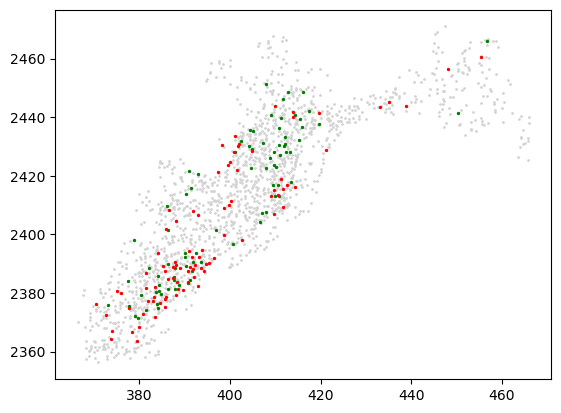

In [62]:
import matplotlib.pyplot as plt
plt.scatter(cell_df.absX,cell_df.absY,s=1, c='#D3D3D3')
plt.scatter(cell_df.loc[dataset.geneList[i]].absX,cell_df.loc[dataset.geneList[i]].absY,s=2, c='g')
plt.scatter(cell_df.loc[dataset.geneList[j]].absX,cell_df.loc[dataset.geneList[j]].absY,s=2, c='r')